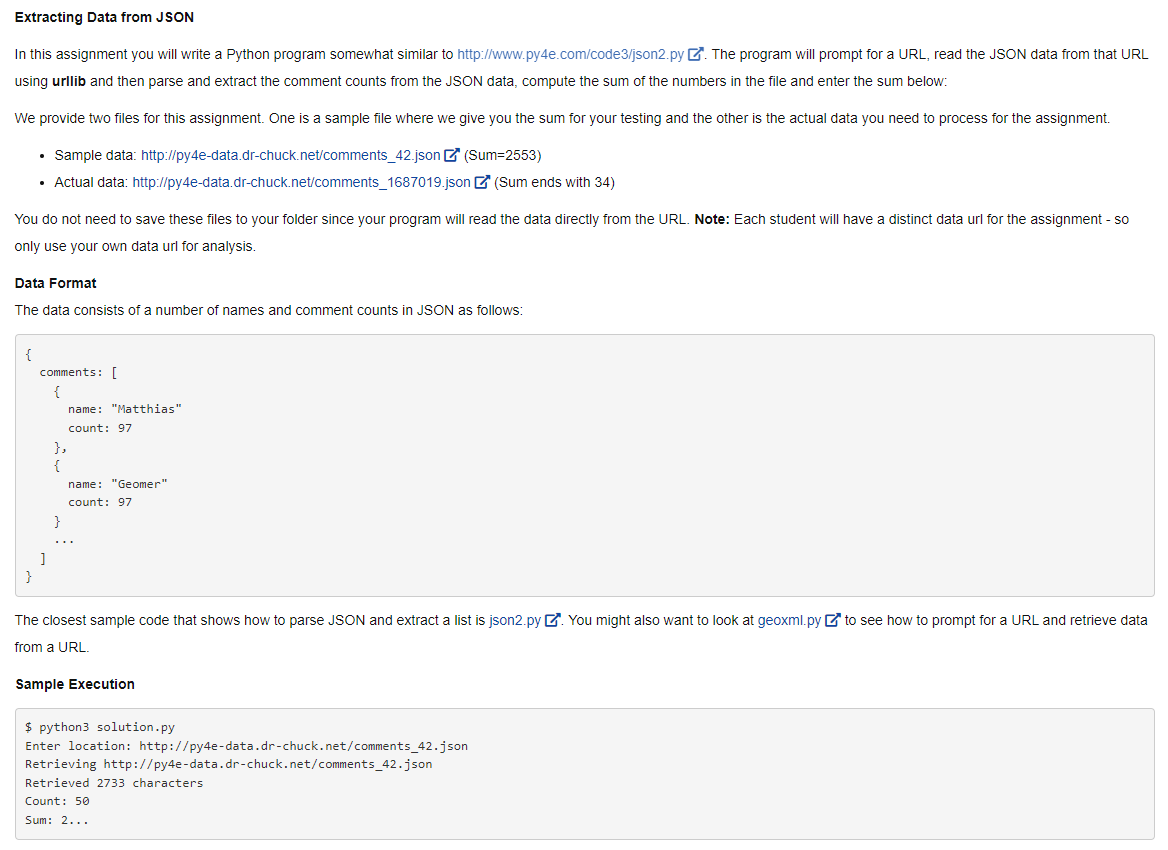

In [20]:
import urllib.request, urllib.parse, urllib.error
import json

url = input('enter url:')
data = urllib.request.urlopen(url).read().decode()

info = json.loads(data)


#print('User count:', len(info['comments']))
#print('#################')
#print(info)
#print('#################')
#print(info['comments'])

c=0
for item in info['comments']:
    c+=item['count']
print(c)

enter url: http://py4e-data.dr-chuck.net/comments_1687019.json


2434


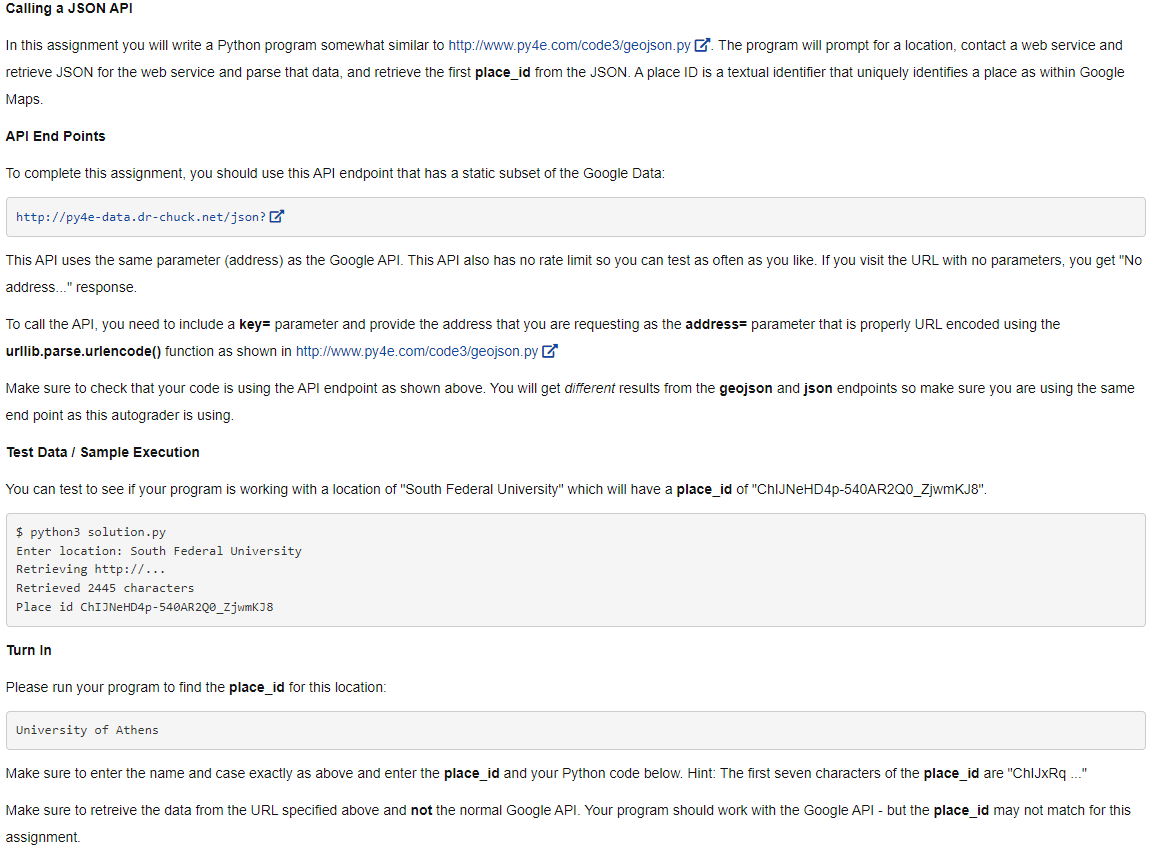

In [37]:
import urllib.request, urllib.parse, urllib.error
import json
import ssl

api_key = False
# If you have a Google Places API key, enter it here
# api_key = 'AIzaSy___IDByT70'
# https://developers.google.com/maps/documentation/geocoding/intro

if api_key is False:
    api_key = 42
    serviceurl = 'http://py4e-data.dr-chuck.net/json?'
else :
    serviceurl = 'https://maps.googleapis.com/maps/api/geocode/json?'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    address = input('Enter location: ')
    if len(address) < 1: break

    parms = dict()
    parms['address'] = address
    if api_key is not False: parms['key'] = api_key
    url = serviceurl + urllib.parse.urlencode(parms)

    print('Retrieving', url)
    uh = urllib.request.urlopen(url, context=ctx)
    data = uh.read().decode()
    print('Retrieved', len(data), 'characters')

    try:
        js = json.loads(data)
    except:
        js = None

    if not js or 'status' not in js or js['status'] != 'OK':
        print('==== Failure To Retrieve ====')
        print(data)
        continue

    #print(json.dumps(js, indent=4))
    print(js["results"][0]["place_id"])
    
    #lat = js['results'][0]['geometry']['location']['lat']
    #lng = js['results'][0]['geometry']['location']['lng']
    #print('lat', lat, 'lng', lng)
    #location = js['results'][0]['formatted_address']
    #print(location)

Enter location:  University of Athens


Retrieving http://py4e-data.dr-chuck.net/json?address=University+of+Athens&key=42
Retrieved 1634 characters
ChIJxRq_LTq9oRQRTdqU4sLcN5Q


Enter location:  
